Sreevidya C 
CB.EN.D*ECE21012-FT

Stochastic Shortest Path maze using Monte Carlo simulation

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [ ]:
# create a maze graph
maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 0]
]

In [ ]:
G = nx.Graph()

In [ ]:
G

In [ ]:
# add nodes
for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == 0:
            G.add_node((i, j))

In [ ]:
# add edges
for node in G.nodes:
    i, j = node
    if i > 0 and maze[i-1][j] == 0:
        G.add_edge(node, (i-1, j))
    if i < len(maze)-1 and maze[i+1][j] == 0:
        G.add_edge(node, (i+1, j))
    if j > 0 and maze[i][j-1] == 0:
        G.add_edge(node, (i, j-1))
    if j < len(maze[0])-1 and maze[i][j+1] == 0:
        G.add_edge(node, (i, j+1))

In [ ]:
# perform Monte Carlo simulation
simulations = 1000
path_lengths = []
for i in range(simulations):
    # sample weights for each edge
    weights = {edge: random.uniform(0, 1) for edge in G.edges}
    nx.set_edge_attributes(G, values=weights, name='weight')
    
    # find shortest path using Dijkstra's algorithm
    path_lengths.append(nx.dijkstra_path_length(G, (0, 0), (5, 5), weight='weight'))

4.959841316620341


(-0.5, 5.5, 5.5, -0.5)

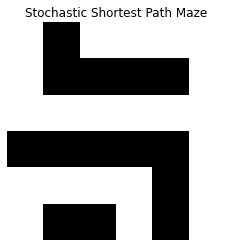

In [ ]:
# calculate expected value
expected_value = sum(path_lengths) / simulations
print(expected_value)

# plot maze
maze = np.array(maze)
plt.imshow(maze, cmap='binary')
plt.title('Stochastic Shortest Path Maze')
plt.axis('off')

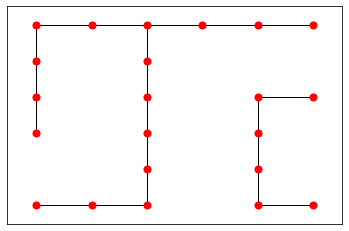

In [ ]:
# plot nodes
pos = {node: node for node in G.nodes}
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50)

# plot edges
nx.draw_networkx_edges(G, pos)

plt.show()

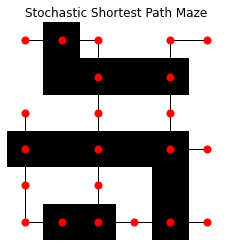

In [ ]:

# plot maze
maze = np.array(maze)
plt.imshow(maze, cmap='binary')
plt.title('Stochastic Shortest Path Maze')
plt.axis('off')

# plot nodes
pos = {node: node for node in G.nodes}
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50)

# plot edges
nx.draw_networkx_edges(G, pos)

plt.show()


Shortest Path (SSP) algorithm using a Markovian Decision Rule and a greedy policy

Found path: [(1, 0), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (1, 5), (0, 5), (0, 4), (0, 3), (0, 4), (0, 3), (0, 2), (0, 3), (0, 4), (0, 5), (0, 4), (0, 5), (0, 4), (0, 5), (1, 5), (2, 5), (2, 4), (2, 3), (2, 4), (2, 5), (2, 4), (2, 5), (1, 5), (2, 5), (2, 4), (2, 3), (2, 4), (2, 3), (2, 4), (2, 3), (2, 2), (2, 3), (2, 4), (2, 5), (1, 5), (0, 5), (1, 5), (0, 5), (1, 5), (0, 5), (0, 4), (0, 5), (0, 4), (0, 5), (0, 4), (0, 5), (1, 5), (0, 5), (1, 5), (0, 5), (1, 5), (0, 5), (0, 4), (0, 5), (1, 5), (0, 5), (0, 4), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (2, 5), (3, 5), (2, 5), (1, 5), (0, 5), (0, 4), (0, 5), (0, 4), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (2, 5), (3, 5), (4, 5), (5, 5)]


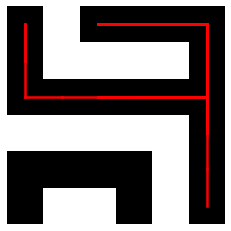

In [ ]:
import matplotlib.pyplot as plt

import random

def plot_maze(maze, path=None):
    fig, ax = plt.subplots()
    rows, cols = len(maze), len(maze[0])
    ax.imshow(np.array(maze), cmap='gray')
    if path:
        for i in range(len(path) - 1):
            start = path[i]
            stop = path[i+1]
            ax.plot([start[1], stop[1]], [start[0], stop[0]], 'r-', linewidth=2.5)
    ax.axis('off')
    plt.show()

def stochastic_shortest_path(maze, start, goal):
    rows, cols = len(maze), len(maze[0])
    state = start
    path = []
    
    while state != goal:
        row, col = state
        neighbors = [(row-1, col), (row, col-1), (row, col+1), (row+1, col)]
        valid_neighbors = [(r, c) for r, c in neighbors if 0 <= r < rows and 0 <= c < cols and maze[r][c] == 0]
        if valid_neighbors:
            state = random.choice(valid_neighbors)
        else:
            return None
        path.append(state)
    
    return path

maze = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 0]
]

start = (0, 0)
goal = (5, 5)
path = stochastic_shortest_path(maze, start, goal)

if path:
    print("Found path:", path)
else:
    print("No path found")
    
if path:
    plot_maze(maze, path)
else:
    print("No path found")